In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
plt.rc('figure', max_open_warning = 0)


# Data preparation

In [ ]:
df = pd.read_excel ('Ian_CD31805.05.2022._Fatma.xlsx')

df=df.fillna(0)
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns = {"rejet_aigu_cellulaire_dans_l'année":'rejet_aigu_cellulaire_dans_lannée'})

df['date_de_rejet_aigu_cellulaire']=pd.factorize(df['date_de_rejet_aigu_cellulaire'])[0]
df['grade_RAC']=pd.factorize(df['grade_RAC'])[0]
df['date_de_TP']=pd.factorize(df['date_de_TP'])[0]


df_scale=pd.DataFrame(StandardScaler().fit_transform(df))
df_scale.index=df.index
df_scale.columns=df.columns

point_clouds = np.asarray(
    [
       df_scale.query("rejet_aigu_cellulaire_dans_lannée == @df")[[ 'CD31_H24',
       'PaO2/FiO2_H24', 'SOFA_respiratoire_H24', 'CD31_H48', 'PaO2/FiO2_H48',
       'SOFA_respiratoire_H48', 'CD31_H72', 'PaO2/FiO2_H72',
       'SOFA_respiratoire_H72'
       ]].values
        for df in df_scale["rejet_aigu_cellulaire_dans_lannée"].unique()
    ]
)

P0 = point_clouds[0].tolist()
P1=point_clouds[1].tolist()

P0 = np.reshape(P0, (len(P0),3, 3))  
P1 = np.reshape(P1, (len(P1),3, 3))

P = np.concatenate((P0, P1), axis=0)

persistence = VietorisRipsPersistence(metric = 'euclidean',homology_dimensions=[0,1,2],n_jobs=-1,collapse_edges=True)

persistence_diagrams = persistence.fit_transform(P)

persistence_entropy = PersistenceEntropy(normalize=True)

X= persistence_entropy.fit_transform(persistence_diagrams)


y=np.zeros(40)
y[33:] = 1

In [3]:
data=df_scale.loc[:,['CD31_H24','PaO2/FiO2_H24', 'SOFA_respiratoire_H24', 'CD31_H48', 'PaO2/FiO2_H48','SOFA_respiratoire_H48',
        'CD31_H72', 'PaO2/FiO2_H72', 'SOFA_respiratoire_H72']]
data

,CD31_H24,PaO2/FiO2_H24,SOFA_respiratoire_H24,CD31_H48,PaO2/FiO2_H48,SOFA_respiratoire_H48,CD31_H72,PaO2/FiO2_H72,SOFA_respiratoire_H72
0,1.467067,-0.841760,0.693889,-0.486515,-0.728181,0.424959,-0.781483,-1.317307,0.802955
1,0.334375,-0.964677,1.405569,-0.149373,-0.437103,0.424959,-0.371089,-0.258397,-0.344124
2,1.931058,-0.938338,0.693889,-1.294867,0.339106,-0.469692,-0.543635,-0.327456,-0.344124
3,-0.037702,-0.841760,0.693889,-0.477723,-0.592345,0.424959,-0.481501,-0.810872,0.802955
4,-0.257592,-0.850540,0.693889,-0.154248,-1.155096,1.319610,-0.302770,-1.041070,0.802955
5,-0.595999,0.475205,-0.729473,-1.294867,0.678698,-0.469692,-0.711944,0.719944,-0.344124
6,0.620421,1.177586,-1.441153,0.146034,1.018289,-1.364343,0.052253,0.731454,-0.344124
7,-0.062870,0.791276,-0.729473,-0.550528,1.163828,-1.364343,-0.960841,0.225018,-0.344124
8,-0.704044,-0.385212,-0.017792,-0.735183,-0.029593,-0.469692,-0.958856,0.581825,-0.344124
9,-0.575751,-0.859320,0.693889,-0.333646,-0.631155,0.424959,-0.525715,-0.143298,-0.344124


In [4]:
data=data.to_numpy()

from sklearn.model_selection import train_test_split
data_train,data_test,y_train,y_test = train_test_split(data,y ,random_state=89)

dataset=[(x,y) for x,y in zip(data_train,y_train)]
data_set=[(x,y) for x,y in zip(data_test,y_test)]

train_loader=DataLoader(dataset, batch_size=5, shuffle=True)
test_loader=DataLoader(data_set,batch_size=5,shuffle=True)

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(9, 2)
            
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 9)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = model().to(device)
model=model.double()
learning_rate = 0.001

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate
)
mse=nn.MSELoss()

# Training

In [ ]:
from gtda.diagrams import Amplitude
import sklearn

losses=[]

num_epochs=400

batch_size = len(train_loader)


for epoch in range(num_epochs):
    
    X=[]
    Y=[]
    
    total_loss = 0
    
    for data in train_loader:
        
        x,y=data


        output = model(x)  
        e=model.encoder(x).detach().numpy()
                
        X.append(e)
        Y.append(y.numpy())
        
        
        dy=persistence.fit_transform(output.detach().numpy()[None,:,:])
        dz=persistence.fit_transform(e[None,:,:])
        dx=persistence.fit_transform(x[None,:,:])
        
        a1=Amplitude(metric='bottleneck').fit_transform(dx)
        a2=Amplitude(metric='wasserstein').fit_transform(dx)
        a3=Amplitude(metric='landscape').fit_transform(dx)
        a4=Amplitude(metric='betti').fit_transform(dx)
        a5=Amplitude(metric='persistence_image').fit_transform(dx)
        
        a=a1+a2+a3+a4+a5
        
        b1=Amplitude(metric='bottleneck').fit_transform(dz)
        b2=Amplitude(metric='wasserstein').fit_transform(dz)
        b3=Amplitude(metric='landscape').fit_transform(dz)
        b4=Amplitude(metric='betti').fit_transform(dz)
        b5=Amplitude(metric='persistence_image').fit_transform(dz)
        
        b=b1+b2+b3+b4+b5
        
        c1=Amplitude(metric='bottleneck').fit_transform(dy)
        c2=Amplitude(metric='wasserstein').fit_transform(dy)
        c3=Amplitude(metric='landscape').fit_transform(dy)
        c4=Amplitude(metric='betti').fit_transform(dy)
        c5=Amplitude(metric='persistence_image').fit_transform(dy)
        
        c=c1+c2+c3+c4+c5
    
        
        l1=(np.linalg.norm(a-b)**2)/2
    
        l2=(np.linalg.norm(b-c)**2)/2
    
        l=l1+l2
        
    
        loss = mse(output, x)+(1e-5)*l
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.data
    total_loss = total_loss / batch_size
    losses.append(total_loss)
    
    Y=np.asarray(Y).reshape(1,-1)
    X=np.asarray(X).reshape(30,2)    
    
    
    print("epoch : {}/{},  loss = {:.4f}".format(epoch + 1, num_epochs, total_loss))
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax.scatter(X[:,0], X[:,1],c=Y,s=50)
    ax.set_title('epoch {}'.format(epoch+1))
    plt.savefig('{}.png'.format(epoch+1), dpi = 300)

# Visualization of loss function

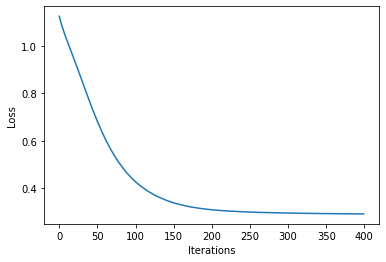

In [8]:
plt.plot(losses[:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Test

====> Test set loss: 0.3615


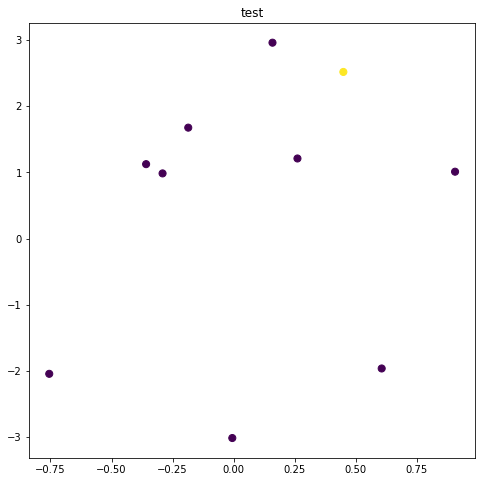

In [9]:
test_loss = 0


with torch.no_grad():
    X=[]
    Y=[]

    for data in test_loader:
        x,y=data

        output = model(x)
        
        e=model.encoder(x).detach().numpy()
                
        X.append(e)
        
        Y.append(y.numpy())
        
        
        dy=persistence.fit_transform(output.detach().numpy()[None,:,:])
        dz=persistence.fit_transform(e[None,:,:])
        dx=persistence.fit_transform(x[None,:,:])

        a1=Amplitude(metric='bottleneck').fit_transform(dx)
        a2=Amplitude(metric='wasserstein').fit_transform(dx)
        a3=Amplitude(metric='landscape').fit_transform(dx)
        a4=Amplitude(metric='betti').fit_transform(dx)
        a5=Amplitude(metric='persistence_image').fit_transform(dx)
        
        a=a1+a2+a3+a4+a5
        
        b1=Amplitude(metric='bottleneck').fit_transform(dz)
        b2=Amplitude(metric='wasserstein').fit_transform(dz)
        b3=Amplitude(metric='landscape').fit_transform(dz)
        b4=Amplitude(metric='betti').fit_transform(dz)
        b5=Amplitude(metric='persistence_image').fit_transform(dz)
        
        b=b1+b2+b3+b4+b5
        
        c1=Amplitude(metric='bottleneck').fit_transform(dy)
        c2=Amplitude(metric='wasserstein').fit_transform(dy)
        c3=Amplitude(metric='landscape').fit_transform(dy)
        c4=Amplitude(metric='betti').fit_transform(dy)
        c5=Amplitude(metric='persistence_image').fit_transform(dy)
        
        c=c1+c2+c3+c4+c5
    
        
        l1=(np.linalg.norm(a-b)**2)/2
    
        l2=(np.linalg.norm(b-c)**2)/2
    
        l=l1+l2
    
        loss = mse(output, x)+(1e-5)*l
        test_loss += loss.item()
        
    test_loss /= len(test_loader)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    
    Y=np.asarray(Y).reshape(1,-1)
    X=np.asarray(X).reshape(10,2)  
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax.scatter(X[:,0], X[:,1],c=Y,s=50)
    ax.set_title('test')

# Visualization of latent space

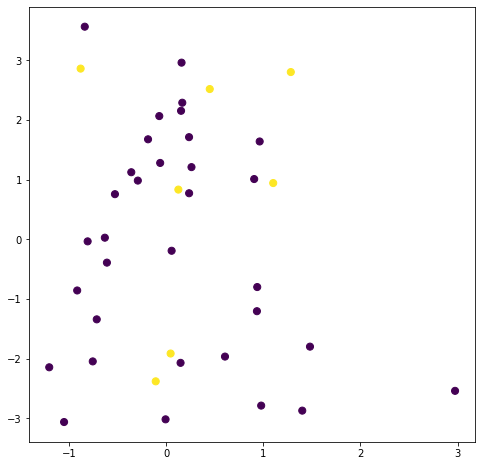

In [10]:
data=df_scale.loc[:,['CD31_H24','PaO2/FiO2_H24', 'SOFA_respiratoire_H24', 'CD31_H48', 'PaO2/FiO2_H48','SOFA_respiratoire_H48',
        'CD31_H72', 'PaO2/FiO2_H72', 'SOFA_respiratoire_H72']]
data=data.to_numpy()
y=np.zeros(40)
y[33:] = 1
m=model.encoder(torch.from_numpy(data))

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.scatter(m[:,0].detach().numpy(), m[:,1].detach().numpy(),c=y,s=50)

# Evaluation

In [11]:
import math
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing

In [12]:
def matrice_distance(data):
    d=euclidean_distances(data,data)
    d=preprocessing.normalize(d)
    return d

def estimateur(data,d,sigma):
    f=[]
    for i in range(40):
        s=0
        for j in range(40):
            s=s+math.exp(- (d[i][j]**2)*(sigma**(-1)))
        f.append(s)
    return f

def KL(a, b):
    a = np.asarray(a, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

In [13]:
m=m.detach().numpy()
A=matrice_distance(m)
B=d=matrice_distance(data)

In [14]:
sigma=[0.01,0.1,1]

f=[estimateur(data,B,sigma) for sigma in sigma]

g=[estimateur(m,A,sigma) for sigma in sigma]

In [15]:
kl=[]
for i in range(3):
    kl.append(KL(f[i],g[i]))

RMSE=[]
MSE = np.square(np.subtract(B,A)).mean()
RMSE.append(math.sqrt(MSE))

from sklearn.manifold import trustworthiness
Trust=[]
Trust.append(sklearn.manifold.trustworthiness(B,A))

from sklearn.metrics import mean_squared_error
mse=[]
mse.append(mean_squared_error(data,model(torch.from_numpy(data)).detach().numpy()))


In [16]:
Tab=pd.DataFrame([kl])
Tab.columns=['KL_0.01','KL_0.1','KL_1']
Tab['RMSE']=RMSE
Tab['Trust']=Trust
Tab['MSE']=mse
Tab

,KL_0.01,KL_0.1,KL_1,RMSE,Trust,MSE
0,-141.282162,-15.683693,-0.214564,0.039304,0.94,0.307919
